In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import polars as pl
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
df = pl.read_parquet(
    "https://osf.io/gk2ty/download",
    use_pyarrow=True,
)


In [3]:
for c in df.columns:
    print(c)


Task
Treatment
Genome Length
Lineage Generation Index
Run ID
Is Task Coding Site
Is Viability Site
Is Task Coding Site Cumulative Count
Is Viability Site Cumulative Count
Prev Is Task Coding Site Cumulative Count
Prev Is Viability Site Cumulative Count
Prev Is Task Coding Site
Prev Is Viability Site
Site
Has Task
has task
delta has task
Delta Has Task
CHILD_SOURCE_MAP
POINT_MUTATION_BOOL_MASK
SLIP_INSERTION_ORIGIN_BOOL_MASK
SLIP_INSERTION_RESULT_BOOL_MASK
GENOME_CHARACTERS
Is Task Coding Site Delta
Is Viability Site Delta
Point Mutation Cumulative Count
Slip Insertion Cumulative Count
Prev Slip Insertion Cumulative Count
SLIP_INSERTION_BOOL_MASK
Generation Born
Update Born


In [4]:
df = df.with_columns(
    pl.col("SLIP_INSERTION_BOOL_MASK").any().over(
        ["Treatment", "Run ID", "Generation Born"],
    ).alias("SLIP_INSERTION_BOOL_MASK any"),
)


In [5]:
df = df.with_columns(
    pl.col("Is Task Coding Site").any().over(
        ["Treatment", "Run ID", "Generation Born", "Site"],
    )
    .alias("is any coding site"),
)


In [6]:
df = df.with_columns(
    pl.col("Is Task Coding Site Delta").sum().over(
        ["Treatment", "Run ID", "Generation Born"],
    )
    .alias("is task coding site delta sum"),
)


In [7]:
df = df.with_columns(
    pl.col("has task").sum().over(
        ["Treatment", "Run ID", "Generation Born", "Site"],
    )
    .alias("num tasks has"),
)


In [8]:
df = df.with_columns(
    pl.col("is any coding site").sum().over(
        ["Treatment", "Run ID", "Generation Born", "Task",],
    ).alias("num coding sites"),
)


In [9]:
df = df.with_columns(
    pl.col("Slip Insertion Cumulative Count").sum().over(
        ["Treatment", "Run ID", "Generation Born", "Task",],
    ).alias("net Slip Insertion Cumulative Count"),
)


In [10]:
dfx = df.group_by(
    ["Treatment", "Run ID", "Generation Born"],
).first()


In [11]:
dfx = dfx.with_columns(
    (
        pl.col("net Slip Insertion Cumulative Count") / pl.col("Genome Length")
    ).alias("mean Slip Insertion Cumulative Count")
)


In [12]:
dfx = dfx.with_columns(
    (
        pl.col("num coding sites") / pl.col("Genome Length")
    ).alias("frac coding sites")
)


teeplots/viz=regplot+x=mean-slip-insertion-cumulative-count+y=frac-coding-sites+ext=.pdf


teeplots/viz=regplot+x=mean-slip-insertion-cumulative-count+y=frac-coding-sites+ext=.png


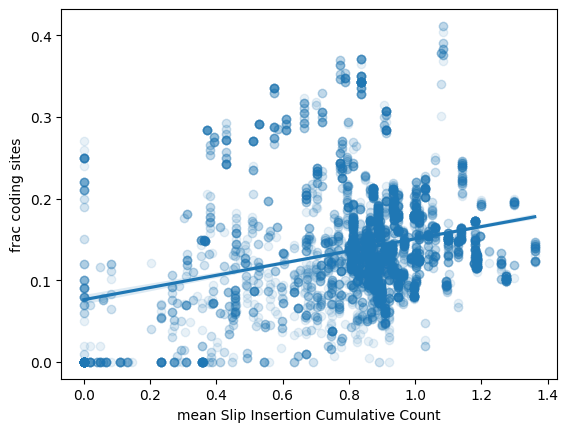

<Axes: xlabel='mean Slip Insertion Cumulative Count', ylabel='frac coding sites'>

In [13]:
tp.tee(
    sns.regplot,
    y="frac coding sites",
    x="mean Slip Insertion Cumulative Count",
    scatter_kws={"alpha": 0.1},
    data=dfx.filter(
        pl.col("Treatment") == "Slip-duplicate",
    ).to_pandas(),
)


teeplots/viz=regplot+x=mean-slip-insertion-cumulative-count+y=num-coding-sites+ext=.pdf


teeplots/viz=regplot+x=mean-slip-insertion-cumulative-count+y=num-coding-sites+ext=.png


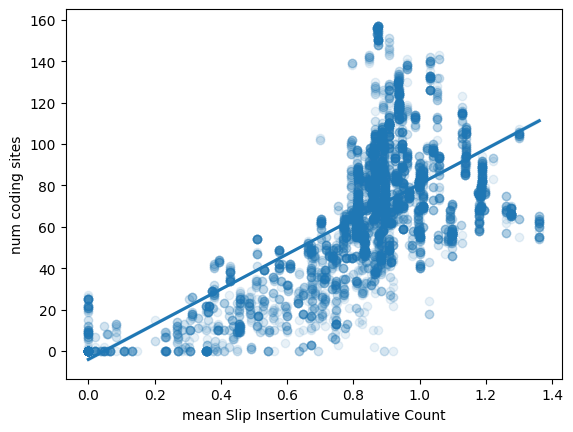

<Axes: xlabel='mean Slip Insertion Cumulative Count', ylabel='num coding sites'>

In [14]:
tp.tee(
    sns.regplot,
    y="num coding sites",
    x="mean Slip Insertion Cumulative Count",
    scatter_kws={"alpha": 0.1},
    data=dfx.filter(
        pl.col("Treatment") == "Slip-duplicate",
    ).to_pandas(),
)
